<a href="https://colab.research.google.com/github/Anshul407/Anshul407/blob/main/imageverification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install deepface &> /dev/null
print ("Deep Face installed sucessfully!!")

Deep Face installed sucessfully!!


In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from deepface import DeepFace
##Load and display input image
import cv2
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


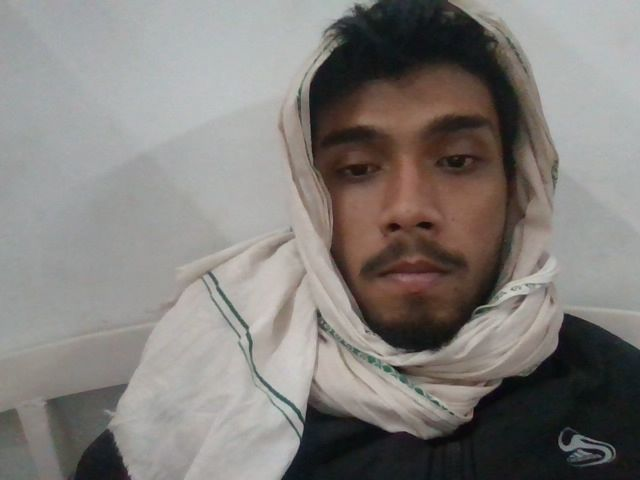

In [20]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

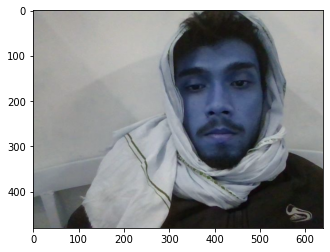

In [21]:
img1=cv2.imread("/content/photo.jpg")
plt.imshow(img1)
plt.show()

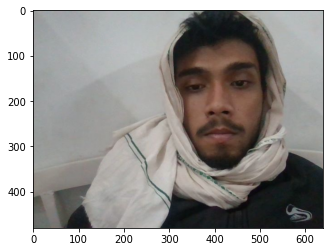

In [22]:
# Plotting the image
# Flipping the color from BGR to RGB
plt.imshow(img1[:, :, ::-1 ]) 
plt.show() 
img2 = img1[:, :, ::-1 ]


In [23]:
##Analyze Image
obj=DeepFace.analyze(img1, actions = ['age', 'gender', 'race', 'emotion'])
print(obj)

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 1s 595ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:02,  1.23it/s]

1/1 [==============================] - 1s 600ms/step


Action: race:  50%|█████     | 2/4 [00:01<00:01,  1.40it/s]  

1/1 [==============================] - 1s 606ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:02<00:00,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

{'age': 24, 'region': {'x': 280, 'y': 61, 'w': 262, 'h': 262}, 'gender': 'Man', 'race': {'asian': 27.649888396263123, 'indian': 15.645617246627808, 'black': 11.613304167985916, 'white': 10.954433679580688, 'middle eastern': 11.116737127304077, 'latino hispanic': 23.020020127296448}, 'dominant_race': 'asian', 'emotion': {'angry': 0.0005580568995355861, 'disgust': 6.50847580582585e-13, 'fear': 0.0008995023563329596, 'happy': 0.00022620872641709866, 'sad': 0.09199566557072103, 'surprise': 2.979884394793686e-08, 'neutral': 99.90631937980652}, 'dominant_emotion': 'neutral'}


In [24]:
##Print Result
print("Age: ",obj["age"])
print("Race: ",obj["dominant_race"])
print("Emotion: ",obj["dominant_emotion"])
print("Gender: ",obj["gender"])

Age:  24
Race:  asian
Emotion:  neutral
Gender:  Man


In [25]:
verification = DeepFace.verify( '/content/WIN_20221123_21_33_36_Pro.jpg', '/content/photo.jpg')
print(verification)

1/1 [==============================] - 1s 602ms/step
{'verified': True, 'distance': 0.23517651296829511, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


In [14]:
print(verification)

{'verified': True, 'distance': 0.15918747644777564, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}
